In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
dataset = pd.read_csv('50_Startups.csv')
X = dataset.iloc[:, 0:3].values
y = dataset.iloc[:, 4].values

Let's find the Correlation

In [3]:
c = dataset.corr()
c

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


Draw the Graph

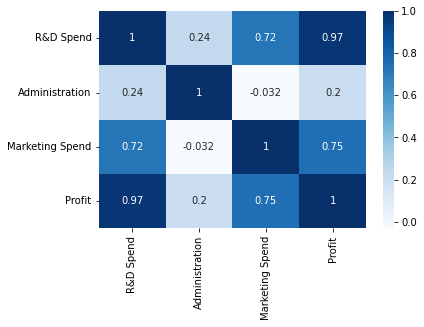

In [4]:
sns.heatmap(c,annot=True,cmap='Blues')
plt.show()

Base on Correretion Graph we can say what R&D Spend and Marketing Spends are directly proportional with the Profit

Create Graphs 


<AxesSubplot:title={'center':'Marketing Spend Vs Profit'}, xlabel='Marketing Spend', ylabel='Profit'>

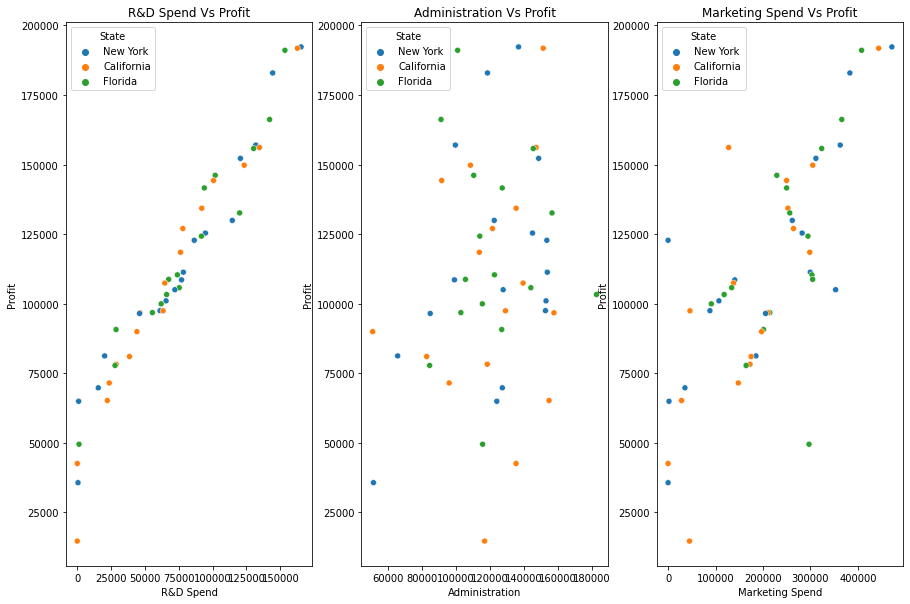

In [5]:

fig, axs = plt.subplots(ncols=3, figsize=(15,10))

axs[0].set_title('R&D Spend Vs Profit')
sns.scatterplot(x = "R&D Spend", y =  "Profit", hue="State", data=dataset, ax=axs[0])

axs[1].set_title('Administration Vs Profit')
sns.scatterplot(x = "Administration", y =  "Profit", hue="State",data=dataset, ax=axs[1])

axs[2].set_title('Marketing Spend Vs Profit')
sns.scatterplot(x = "Marketing Spend", y = "Profit", hue="State", data=dataset, ax=axs[2])


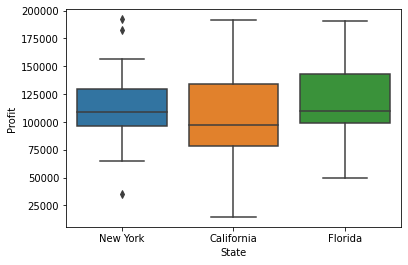

In [6]:
sns.boxplot(x = 'State', y = 'Profit', data = dataset)
plt.show()

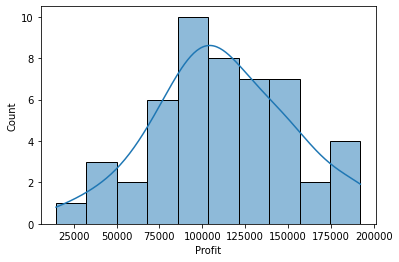

In [7]:
sns.histplot(dataset['Profit'],bins=10,kde=True)
plt.show()

Here we go again

In [8]:

# handlign Dummy Variables
dummy = pd.get_dummies(dataset["State"])
df = pd.concat([dummy, dataset], axis=1)
df.drop(["State"], inplace=True, axis=1)
X =  df.iloc[:, 0:6].values
y = df.iloc[:, -1:].values
df.head()

,California,Florida,New York,R&D Spend,Administration,Marketing Spend,Profit
0,0,0,1,165349.20,136897.80,471784.10,192261.83
1,1,0,0,162597.70,151377.59,443898.53,191792.06
2,0,1,0,153441.51,101145.55,407934.54,191050.39
3,0,0,1,144372.41,118671.85,383199.62,182901.99
4,0,1,0,142107.34,91391.77,366168.42,166187.94


Training & Tests


In [9]:
from sklearn.model_selection import train_test_split

Training Model

#Create linear regression model and fit it:

In [10]:
regressor = LinearRegression() # Regression object created
regressor.fit(X, y) # Training model


LinearRegression()

Prediction 

In [11]:
y_pred = regressor.predict(X) # predicting 
y_pred = np.round(y_pred, 2)


Printing Real & Predicted Values


In [12]:
for item in range(len(y)):
    print(str(y[item]) + " -------> " +str(y_pred[item]))

[192261.83] -------> [192390.57]
[191792.06] -------> [189071.32]
[191050.39] -------> [182276.19]
[182901.99] -------> [173584.98]
[166187.94] -------> [172277.13]
[156991.12] -------> [163473.81]
[156122.51] -------> [158099.29]
[155752.6] -------> [160155.64]
[152211.77] -------> [151634.74]
[149759.96] -------> [154829.66]
[146121.95] -------> [135664.64]
[144259.4] -------> [135528.6]
[141585.52] -------> [129282.92]
[134307.35] -------> [127431.25]
[132602.65] -------> [149694.38]
[129917.04] -------> [146143.64]
[126992.93] -------> [116854.07]
[125370.37] -------> [130085.41]
[124266.9] -------> [129149.73]
[122776.86] -------> [115594.19]
[118474.03] -------> [116570.73]
[111313.02] -------> [117201.51]
[110352.25] -------> [114833.31]
[108733.99] -------> [110123.8]
[108552.04] -------> [113294.37]
[107404.34] -------> [102200.27]
[105733.54] -------> [110765.3]
[105008.31] -------> [114279.8]
[103282.38] -------> [101818.59]
[101004.64] -------> [101721.04]
[99937.59] ------

In [14]:
from sklearn.metrics import r2_score
score=r2_score(y,y_pred)
score

0.950752481588887

In [15]:
regressor.coef_[0]

array([-5.23005912e+01,  1.46488202e+02, -9.41876104e+01,  8.06023114e-01,
       -2.70043196e-02,  2.69798610e-02])